# Dependencies


In [2]:
# updated to the latest dependencies on February 2023
!pip install google-cloud-aiplatform==1.7.1 --upgrade
!pip install google-cloud-pipeline-components==0.2.0 --upgrade
!pip install kfp==1.8.8 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.10.0
    Uninstalling google-cloud-bigquery-3.10.0:
      Successfully uninstalled google-cloud-bigquery-3.10.0
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.21.0
    Uninstalling google-cloud-aiplatform-1.21.0:
      Successfully uninstalled google-cloud-aiplatform-1.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.9/304.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of google-api-core[grpc] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 14.6 MB/s eta 0:00:00
  Created wheel for kfp: filename=

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 17.3 MB/s eta 0:00:00
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Please restart your Colab runtime before importing the modules**

Otherwise you might get a version conflict related error.

In [10]:
import kfp

from typing import NamedTuple

from kfp.v2.dsl import pipeline
from kfp.v2.dsl import component
from kfp.v2.dsl import OutputPath
from kfp.v2.dsl import InputPath

from kfp.v2.dsl import Output
from kfp.v2.dsl import Metrics

from kfp.v2 import compiler
from kfp.v2.google.client import AIPlatformClient


from google.cloud import aiplatform
from google.cloud.aiplatform import pipeline_jobs

from google_cloud_pipeline_components import aiplatform as gcc_aip

#from google_cloud_pipeline_components.v1.model import ModelUploadOp

# Authentication

In [7]:
from google.colab import auth
auth.authenticate_user()

credentials = auth._check_adc()
print(credentials)

True


set the project id

In [8]:
PROJECT_ID = "unified-poet-399716"
PIPELINE_ROOT = "gs://data_iris/"

# Clients

In [11]:
# use this instead
aiplatform.init(project=PROJECT_ID,
                location='us-central1')

# Modelo

## Dependencies

In [1]:
from typing import NamedTuple

from kfp.v2 import dsl
from kfp.v2.dsl import (Artifact,
                        Dataset,
                        Input,
                        Model,
                        Output,
                        Metrics,
                        ClassificationMetrics,
                        component,
                        Markdown)

from kfp.v2 import compiler

## EDA

Importamos el dataset almacenado en Cloud Storage

In [38]:
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "unified-poet-399716-a8f36e2995f2.json"

In [39]:
from google.cloud import storage
import pandas as pd
from io import StringIO

def read_data_from_gcs(bucket_name, file_name):
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(file_name)
    content = blob.download_as_text()
    return pd.read_csv(StringIO(content))

# Usar la función
bucket_name = "data_iris"
file_name = "iris.data"
df = read_data_from_gcs(bucket_name, file_name)

In [40]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df.columns = column_names

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [42]:
df.shape

(149, 5)

El DataFrame df tiene 149 filas y 5 columnas.

In [43]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Total de registros: 149

Longitud del sépalo (sepal_length):

Media: 5.85 cm
Rango: 4.3 cm - 7.9 cm
Desviación estándar: 0.83 cm
Ancho del sépalo (sepal_width):

Media: 3.05 cm
Rango: 2.0 cm - 4.4 cm
Desviación estándar: 0.43 cm
Longitud del pétalo (petal_length):

Media: 3.77 cm
Rango: 1.0 cm - 6.9 cm
Desviación estándar: 1.76 cm
Ancho del pétalo (petal_width):

Media: 1.21 cm
Rango: 0.1 cm - 2.5 cm
Desviación estándar: 0.76 cm


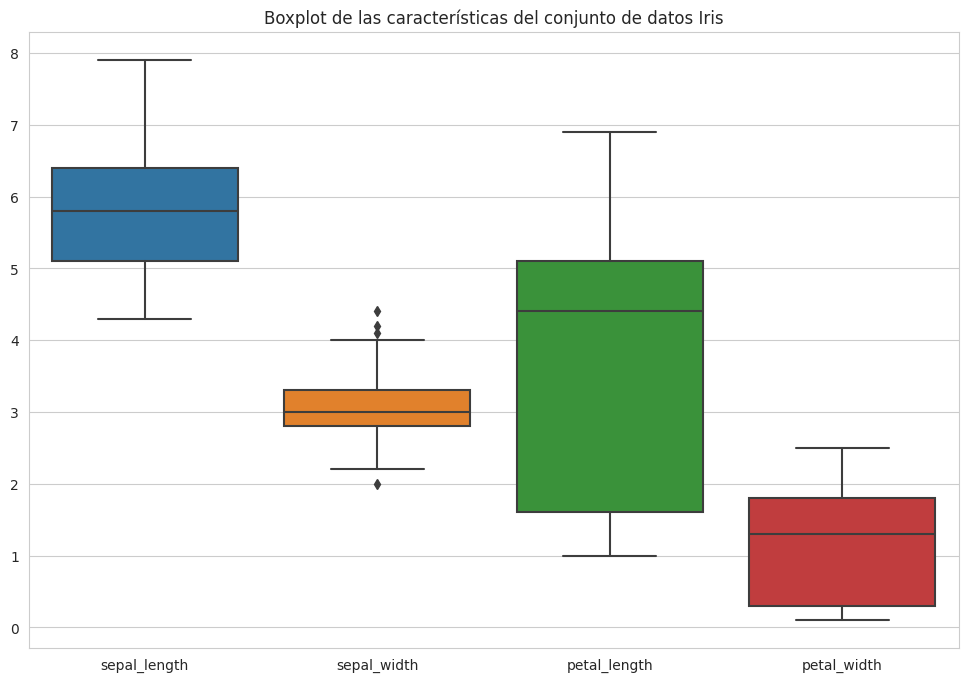

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["species"]))
plt.title("Boxplot de las características del conjunto de datos Iris")
plt.show()


Se tiene una pequeña cantidad de outliers en la variable sepal_width, pero no se eliminarán por ser una cantidad pequeña de datos.

In [47]:
null_counts = df.isnull().sum()
print(null_counts)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


No se tiene datos nulos

## Data

In [2]:
@component(
    packages_to_install = [
        "pandas==1.3.4",
        "scikit-learn==1.0.1",
    ],
)
def get_data(
    dataset_train: Output[Dataset],
    dataset_test: Output[Dataset],
):

    from sklearn import datasets
    from sklearn.model_selection import train_test_split as tts
    import pandas as pd

    # dataset iris
    data_raw = datasets.load_iris()
    data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
    data["target"] = data_raw.target

    train, test = tts(data, test_size=0.3)

    train.to_csv(dataset_train.path)
    test.to_csv(dataset_test.path)



## Training

In [3]:
@component(
    packages_to_install = [
        "pandas==1.3.4",
        "xgboost==1.5.1",
        "scikit-learn==1.0.1", #xgboost requires scikitlearn
    ],
)
def train_model(
    dataset: Input[Dataset],
    model_artifact: Output[Model]
):

    from xgboost import XGBClassifier
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    data = pd.read_csv(dataset.path)
    X = data.drop(columns=["target"])
    y = data.target

    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(
        objective="multi:softprob",
        num_class=3  # 3 clases en el dataset Iris
    )
    model.fit(
        X_train,
        y_train
    )

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    model_artifact.metadata["train_score"] = float(score)
    model_artifact.metadata["framework"] = "XGBoost"

    print(model_artifact.path)

    model.save_model(model_artifact.path)


## Evaluation

In [4]:
@component(
    packages_to_install=[
        "pandas==1.3.4",
        "scikit-learn==1.0.1",
        "xgboost==1.5.1"
    ],
)
def eval_model(
    test_set: Input[Dataset],
    xgb_model: Input[Model],
    metrics: Output[ClassificationMetrics],
    smetrics: Output[Metrics]
) -> NamedTuple("Outputs", [("deploy", str)]):
    from xgboost import XGBClassifier
    import pandas as pd
    from sklearn.metrics import classification_report, confusion_matrix

    data = pd.read_csv(test_set.path)
    model = XGBClassifier()
    model.load_model(xgb_model.path)

    y_pred = model.predict(data.drop(columns=["target"]))
    score = model.score(data.drop(columns=["target"]), data.target)

    # Obtener reporte de clasificación
    report = classification_report(data.target, y_pred, output_dict=True)

    # Registrar las métricas por clase
    for label, metrics_dict in report.items():
        for metric_name, value in metrics_dict.items():
            smetrics.log_metric(f"{label}_{metric_name}", value)

    # Log confusion matrix
    labels = ["setosa", "versicolor", "virginica"]
    metrics.log_confusion_matrix(
        labels,
        confusion_matrix(data.target, y_pred).tolist()
    )

    # Comparar el score con un umbral para decidir si desplegar
    deploy = "true" if score > 0.9 else "false"  # por ejemplo, si deseamos un umbral del 90%

    return (deploy,)


## Deployment

In [5]:
@component(packages_to_install=["google-cloud-aiplatform==1.3.0"])
def deploy(
    model: Input[Model],
    project: str,
    region: str,):

  import logging
  from google.cloud import aiplatform
  aiplatform.init(project=project, location=region)

  logging.basicConfig(level=logging.DEBUG)
  logging.debug(model)

  print(model)
  print(model.uri)

  import os
  path, file = os.path.split(model.uri)

  # datetime.datetime.now().strftime('%Y%m%d%H%M%S')
  # serving image https://cloud.google.com/vertex-ai/docs/predictions/pre-built-containers#xgboost
  deployed_model = aiplatform.Model.upload(
        display_name="xgboost-iris-pipeline",  # changed to indicate it's for the iris dataset
        artifact_uri=path,
        serving_container_image_uri="us-docker.pkg.dev/vertex-ai/prediction/xgboost-cpu.1-4:latest"
  )


## Pipeline

In [12]:
@dsl.pipeline(
    # Default pipeline root. You can override it when submitting the pipeline.
    pipeline_root=PIPELINE_ROOT + "xgboost-iris-pipeline",
    # A name for the pipeline. Use to determine the pipeline Context.
    name="xgboost-iris-pipeline-with-deployment",
)
def iris_pipeline():
    dataset_op = get_data()
    training_op = train_model(dataset_op.outputs["dataset_train"])
    eval_op = eval_model(
        test_set=dataset_op.outputs["dataset_test"],
        xgb_model=training_op.outputs["model_artifact"]
    )

    # Condition to deploy the model if 'deploy' is true
    with dsl.Condition(
        eval_op.outputs["deploy"] == "true",
        name="Check-to-Deploy",
    ):
        deploy_op = deploy(
            training_op.outputs["model_artifact"],
            'sascha-playground-doit',
            'us-central1'
        )



    # we need a solution for xgb models
    # its here https://cloud.google.com/vertex-ai/docs/predictions/deploy-model-api#aiplatform_deploy_model_custom_trained_model_sample-python


## Compile

In [74]:
compiler.Compiler().compile(
    pipeline_func=iris_pipeline,
    package_path='xgb_pipeline.json')

## Run Pipeline

In [77]:
job = pipeline_jobs.PipelineJob(
    display_name="xgb-pipeline",
    template_path="xgb_pipeline.json"
)

job.run(sync=False)

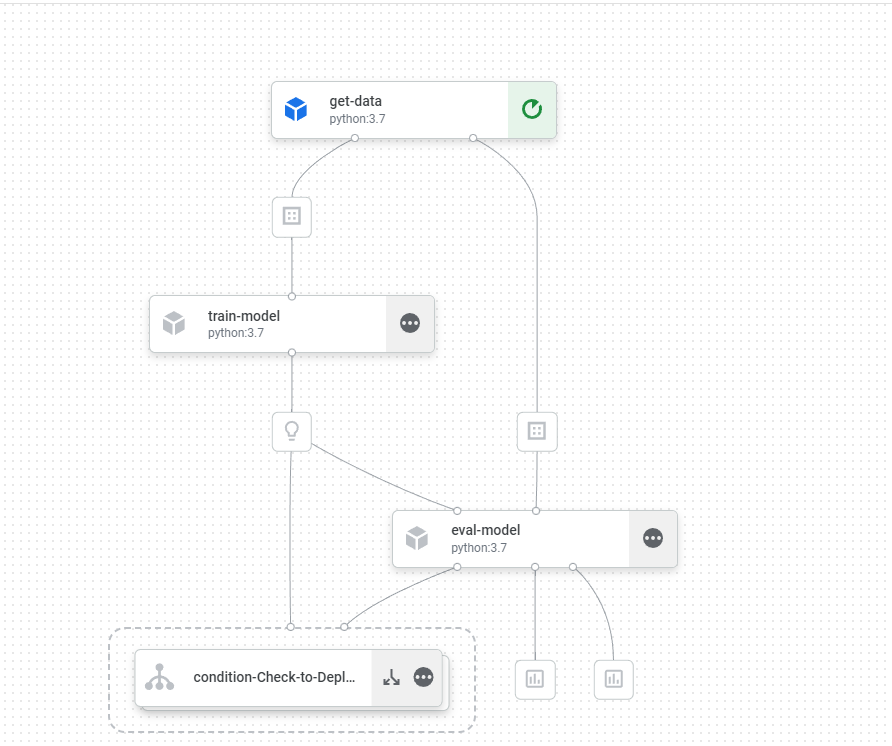

## Serving Container
code for the container see https://github.com/SaschaHeyer/serving-custom-container

In [37]:
@component(packages_to_install=[
    "google-cloud-build==3.8.3",
    "google-api-python-client"])
def build_serving_container(model_artifact: Input[Model]) -> NamedTuple("Outputs", [("container", str)]):
    from google.cloud.devtools import cloudbuild
    from googleapiclient.discovery import build
    import time

    print('deploy.............')
    print(model_artifact.uri)

    client = cloudbuild.CloudBuildClient()
    build = cloudbuild.Build()


    # version is current timestamp
    version = str(int(time.time()))
    container = "gcr.io/sascha-playground-doit/sentiment-fast-api-test:{}".format(version)


    #todo get the model from the pipeline folder
    build.steps = [{"name": "gcr.io/cloud-builders/git",
                    "args": ["clone", "https://github.com/SaschaHeyer/serving-custom-container"]},
                   {"name": "gcr.io/cloud-builders/gsutil",
                    "args": ["cp", "-r", "gs://doit-vertex-demo/models/sentiment", "./serving-custom-container"]},
                   {"name": "gcr.io/cloud-builders/docker",
                    "args": ["build", "-t", container, "serving-custom-container" ]},
                   {"name": "gcr.io/cloud-builders/docker",
                    "args": ["push", container]}]

    #build.substitutions = {"_VERSION": version}

    operation = client.create_build(project_id="sascha-playground-doit", build=build)
    # Print the in-progress operation
    print("IN PROGRESS:")
    print(operation.metadata)

    result = operation.result()
    # Print the completed status
    print("RESULT:", result.status)

    return (container,)